In [214]:
import pandas as pd

df = pd.read_csv('Data/Demanda_electricidad_mensual.csv')
df.describe()

,Demanda(GWh)
count,188.000000
mean,11210.787234
std,2060.682501
min,7366.000000
25%,9379.000000
50%,11442.500000
75%,12869.500000
max,15359.000000


C:\Users\garfi\AppData\Local\Temp\ipykernel_20028\3085503905.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.xticks(ticks=range(0, 12), labels=pd.date_range(start='2021-01', periods=12, freq='M').strftime('%b'))


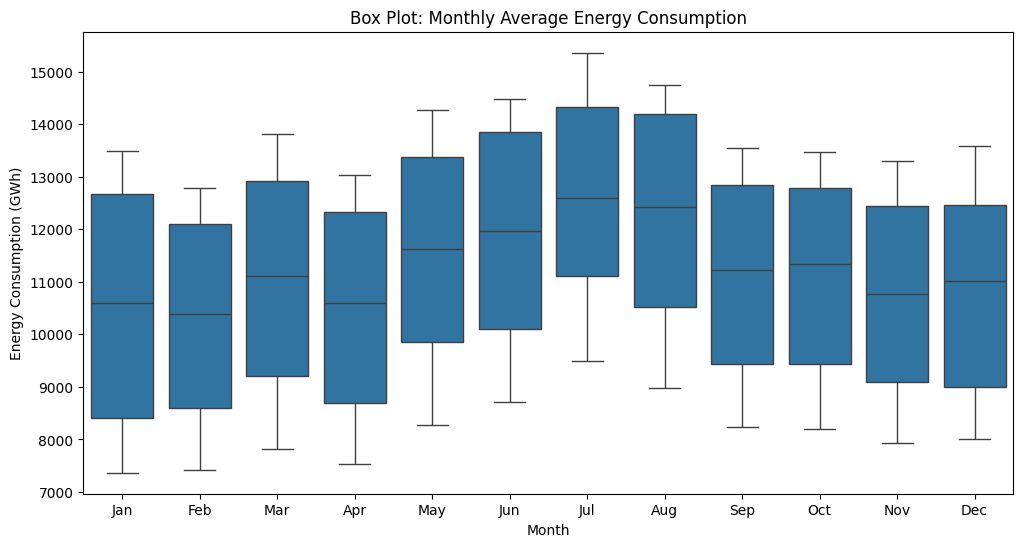

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mapeo de los nombres de los meses de español a inglés
meses_map = {
    'Ene': 'Jan', 'Feb': 'Feb', 'Mar': 'Mar', 'Abr': 'Apr',
    'May': 'May', 'Jun': 'Jun', 'Jul': 'Jul', 'Ago': 'Aug',
    'Set': 'Sep', 'Oct': 'Oct', 'Nov': 'Nov', 'Dic': 'Dec'
}

# Reemplazar los nombres de los meses en español por los nombres en inglés
df['Fecha'] = df['Fecha'].replace(meses_map, regex=True)

# Convertir la columna 'Fecha' a datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b-%y')

# Extracción del mes y el año para agrupación
df['Year'] = df['Fecha'].dt.year
df['Month'] = df['Fecha'].dt.month

data = df.copy()

# Agrupar por año y mes
monthly_data = df.groupby(['Year', 'Month'])['Demanda(GWh)'].mean().reset_index()

# Crear una nueva columna 'Date' como índice para la serie de tiempo mensual
monthly_data['Date'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(DAY=1))

# Configurando 'Date' como el índice
monthly_data.set_index('Date', inplace=True)

# Graficando el box plot por mes
plt.figure(figsize=(12, 6))
sns.boxplot(x=monthly_data.index.month, y='Demanda(GWh)', data=monthly_data)

# Personalizando el gráfico
plt.title('Box Plot: Monthly Average Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (GWh)')
plt.xticks(ticks=range(0, 12), labels=pd.date_range(start='2021-01', periods=12, freq='M').strftime('%b'))

plt.show()

In [216]:
# Corregir el mapeo incorrecto y aplicarlo de nuevo
import numpy as np
meses_map = {
    'Ene': 'Jan', 'Feb': 'Feb', 'Mar': 'Mar', 'Abr': 'Apr',
    'May': 'May', 'Jun': 'Jun', 'Jul': 'Jul', 'Ago': 'Aug',
    'Set': 'Sep', 'Oct': 'Oct', 'Nov': 'Nov', 'Dic': 'Dec'
}

df['Fecha'] = df['Fecha'].replace(meses_map, regex=True)

# Intentar la conversión de nuevo
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b-%y')

# Establecer 'Fecha' como índice
df.set_index('Fecha', inplace=True)
start_date = df.index.min()
df['Time'] = ((df.index - start_date) / np.timedelta64(1, 'D')).astype(int) / 30.4
# Mostrar las primeras filas para verificar las conversiones
df.head()


,Demanda(GWh),Year,Month,Time
Fecha,,,,
1980-01-01,7366,1980,1,0.000000
1980-02-01,7414,1980,2,1.019737
1980-03-01,7824,1980,3,1.973684
1980-04-01,7524,1980,4,2.993421
1980-05-01,8279,1980,5,3.980263


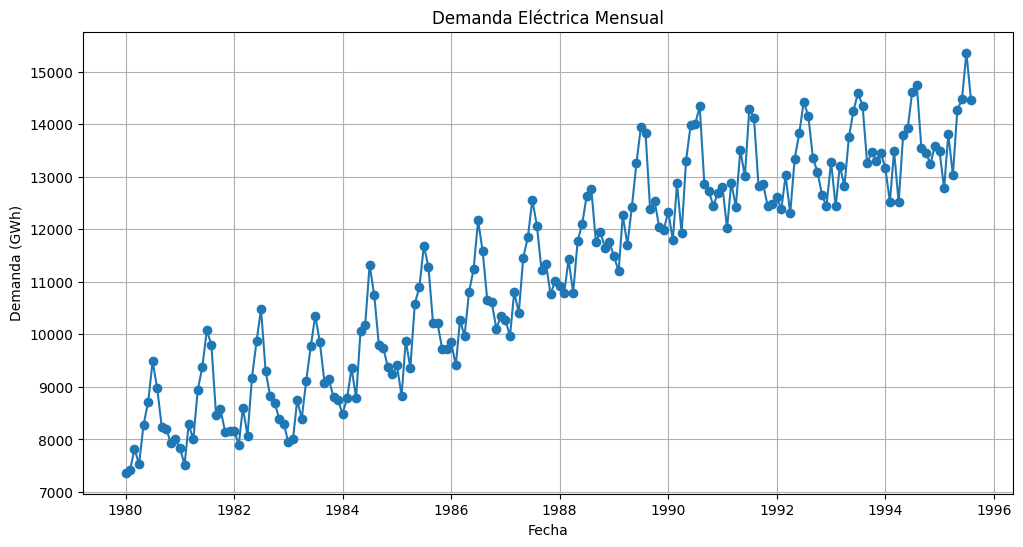

In [217]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Demanda(GWh)'], marker='o', linestyle='-')
plt.title('Demanda Eléctrica Mensual')
plt.xlabel('Fecha')
plt.ylabel('Demanda (GWh)')
plt.grid(True)
plt.show()


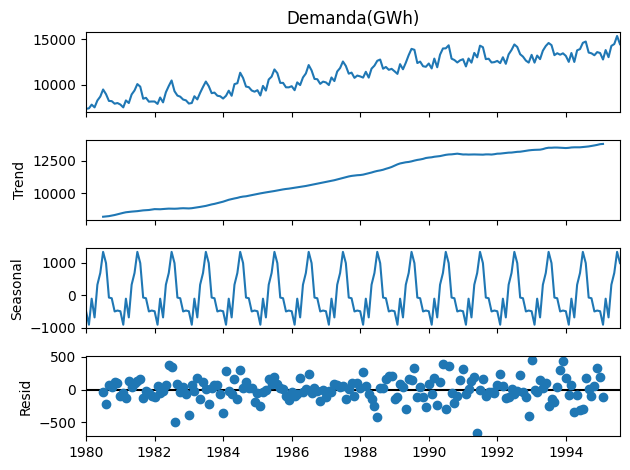

In [218]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie
result = seasonal_decompose(df['Demanda(GWh)'], model='additive', period=12)
result.plot()
plt.show()

In [219]:
df

,Demanda(GWh),Year,Month,Time
Fecha,,,,
1980-01-01,7366,1980,1,0.000000
1980-02-01,7414,1980,2,1.019737
1980-03-01,7824,1980,3,1.973684
1980-04-01,7524,1980,4,2.993421
1980-05-01,8279,1980,5,3.980263
...,...,...,...,...
1995-04-01,13032,1995,4,183.190789
1995-05-01,14268,1995,5,184.177632
1995-06-01,14473,1995,6,185.197368


In [220]:

df_train = df.iloc[:172]
df_test = df.iloc[172:]
df_train

,Demanda(GWh),Year,Month,Time
Fecha,,,,
1980-01-01,7366,1980,1,0.000000
1980-02-01,7414,1980,2,1.019737
1980-03-01,7824,1980,3,1.973684
1980-04-01,7524,1980,4,2.993421
1980-05-01,8279,1980,5,3.980263
...,...,...,...,...
1993-12-01,13456,1993,12,167.203947
1994-01-01,13171,1994,1,168.223684
1994-02-01,12517,1994,2,169.243421


# Creamos funciones

In [221]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import norm

def plot_residuals_analysis(residuals, name_model=None):
    import matplotlib.pyplot as plt
    from statsmodels.graphics.tsaplots import plot_acf
    from scipy.stats import norm
    import seaborn as sns
    import numpy as np

    # Residuals over time
    plt.figure(figsize=(12, 8))
    plt.subplot(311)
    plt.plot(residuals.index, residuals, label='Residuos')
    plt.title(f'Residuales del {name_model}')
    plt.legend()
    
    # ACF plot, con el número de retrasos ajustado para no exceder la longitud de los residuos
    max_lags = min(len(residuals) - 1, 36)  # Asegúrate de no exceder el número de residuos
    plt.subplot(323)
    plot_acf(residuals, lags=max_lags, ax=plt.gca())
    plt.title('ACF')
    
    # Histograma de residuos con densidad normal estimada
    plt.subplot(324)
    sns.histplot(residuals, kde=True, stat="density", linewidth=0)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, residuals.mean(), residuals.std())
    plt.plot(x, p, 'k', linewidth=2)
    plt.title('Histograma de Residuos')
    plt.xlabel('Residuos')

    plt.tight_layout()
    plt.show()

In [222]:
import matplotlib.pyplot as plt

def plot_forecast(train, test, forecast, fitted, title):
    """
    Plot training and test data with forecast and fitted values.

    Parameters:
    train (pd.Series): Training data.
    test (pd.Series): Test data.
    forecast (pd.Series): Forecasted values.
    fitted (pd.Series): Fitted values from the model.
    title (str): Title for the plots.
    """
    # Plot actual vs forecast
    plt.figure(figsize=(14, 7))
    plt.plot(train['Demanda(GWh)'], label='Training Data')
    plt.plot(test['Demanda(GWh)'], label='Test Data', color='orange')
    plt.plot(forecast, label='Forecast', color='green')
    plt.title(f'{title}: Forecast vs Actual Data')
    plt.xlabel('Time')
    plt.ylabel('Demand (GWh)')
    plt.legend()
    plt.show()
    # Plot model fitting
    plt.figure(figsize=(14, 7))
    plt.plot(train['Demanda(GWh)'], label='Training Data')
    plt.plot(fitted, label='Fitted Values', color='red')
    plt.title(f'{title}: Model Fitting')
    plt.xlabel('Time')
    plt.ylabel('Demand (GWh)')
    plt.legend()
    plt.show()

c:\Users\garfi\OneDrive\Escritorio\Topicos ayudantia\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


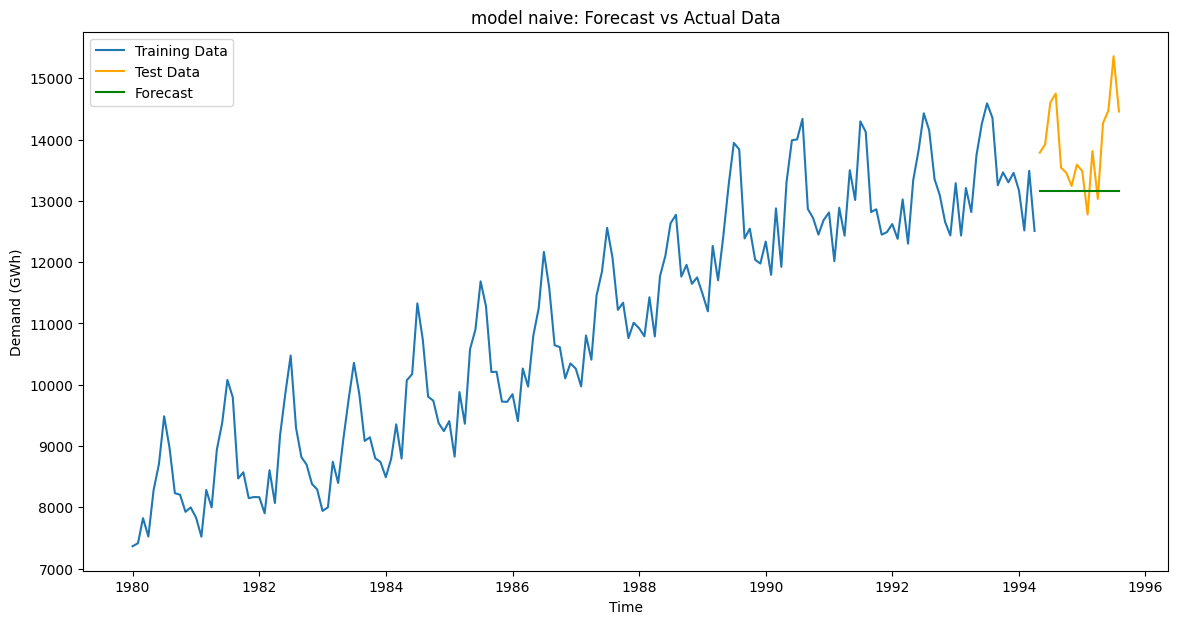

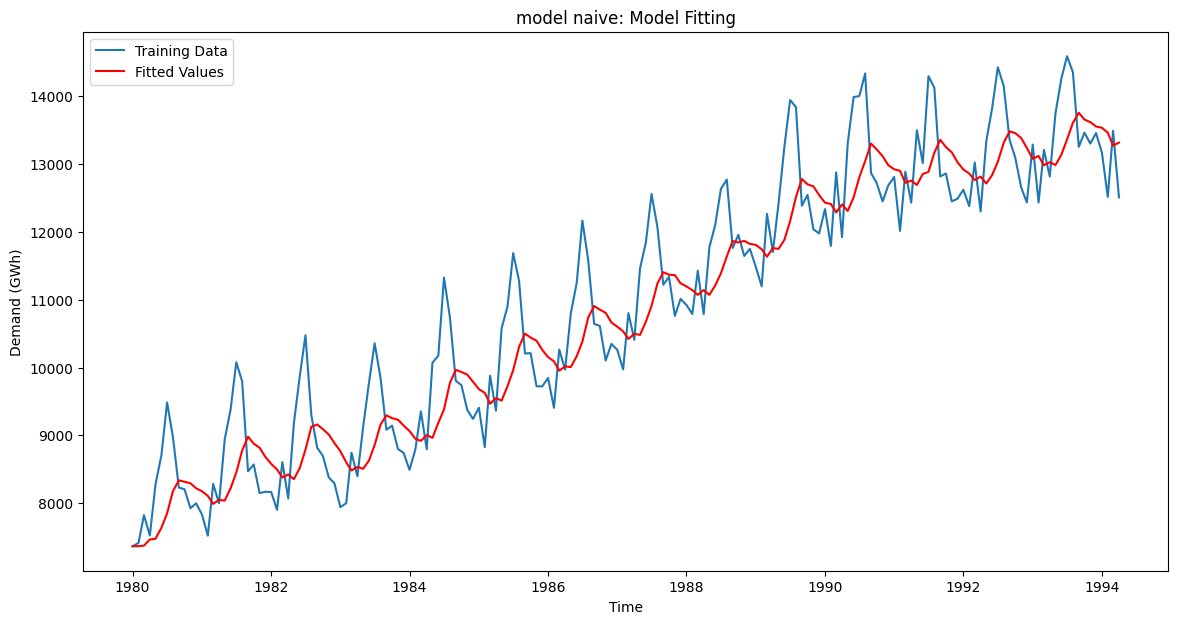

In [241]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error, r2_score


# Ajuste del modelo Naive
model_naive = SimpleExpSmoothing(df_train['Demanda(GWh)']).fit(smoothing_level=0.2,optimized=False)

# Pronóstico para los próximos 16 períodos
forecast_naive = model_naive.forecast(16)

plot_forecast(df_train, df_test, forecast_naive, model_naive.fittedvalues, "model naive")

In [243]:
mse_naive = mean_squared_error(df_test['Demanda(GWh)'], forecast_naive)
rmse = np.sqrt(mse_naive)
r2 = r2_score(df_test['Demanda(GWh)'], forecast_naive)

print(f"Mean Squared Error (MSE): {mse_naive}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Coefficient of Determination (R^2): {r2}")


Mean Squared Error (MSE): 1018192.7928171491
Root Mean Squared Error (RMSE): 1009.0553963074323
Coefficient of Determination (R^2): -1.2693875798898544


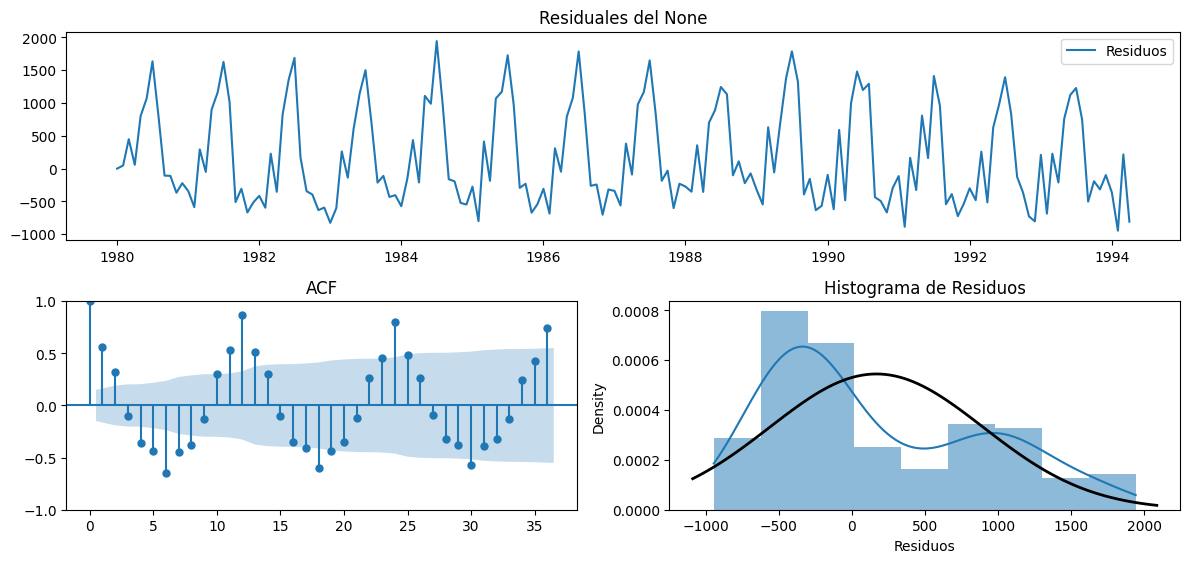

In [225]:
residuals = model_naive.resid
plot_residuals_analysis(residuals)

c:\Users\garfi\OneDrive\Escritorio\Topicos ayudantia\.venv\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2692.282, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2689.186, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2690.570, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2690.677, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2684.658, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2683.891, Time=0.13 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2669.330, Time=0.12 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2667.009, Time=0.10 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=2660.632, Time=0.52 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2660.329, Time=0.61 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=2635.933, Time=0.53 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=2636.8

c:\Users\garfi\OneDrive\Escritorio\Topicos ayudantia\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\garfi\OneDrive\Escritorio\Topicos ayudantia\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\garfi\OneDrive\Escritorio\Topicos ayudantia\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\garfi\OneDrive\Escritorio\Topicos ayudantia\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive paramet

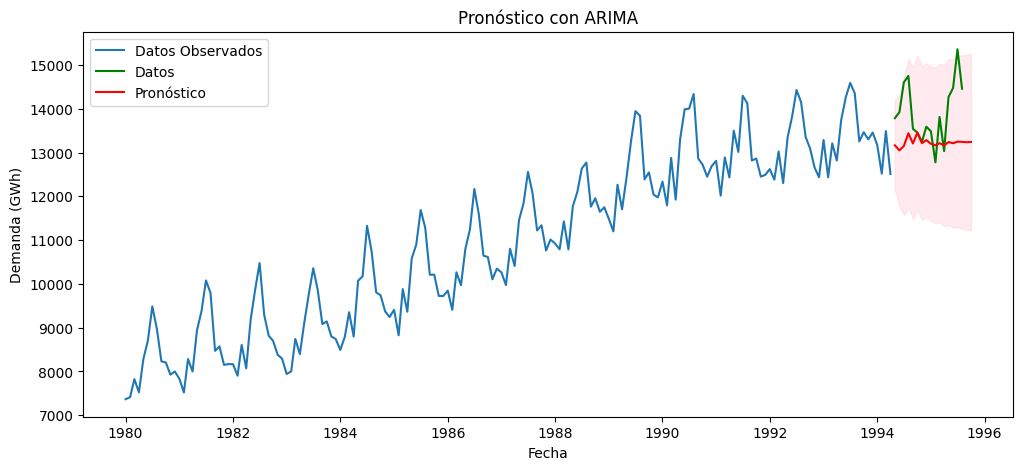

In [226]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

auto_model = auto_arima(df_train['Demanda(GWh)'], seasonal=False, m=12, trace=True)

# Ajustar el modelo ARIMA con los parámetros encontrados
model = ARIMA(df_train['Demanda(GWh)'], order=auto_model.order)
fit_model = model.fit()

# Pronosticar los próximos 12 meses (o el número de periodos que desees)
forecast = fit_model.get_forecast(steps=18)
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()

# Graficar los resultados
plt.figure(figsize=(12, 5))
plt.plot(df_train.index, df_train['Demanda(GWh)'], label='Datos Observados')
plt.plot(df_test.index, df_test['Demanda(GWh)'], label='Datos', color='g')
plt.plot(mean_forecast.index, mean_forecast, label='Pronóstico', color='r')
plt.fill_between(mean_forecast.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Pronóstico con ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Demanda (GWh)')
plt.legend()
plt.show()

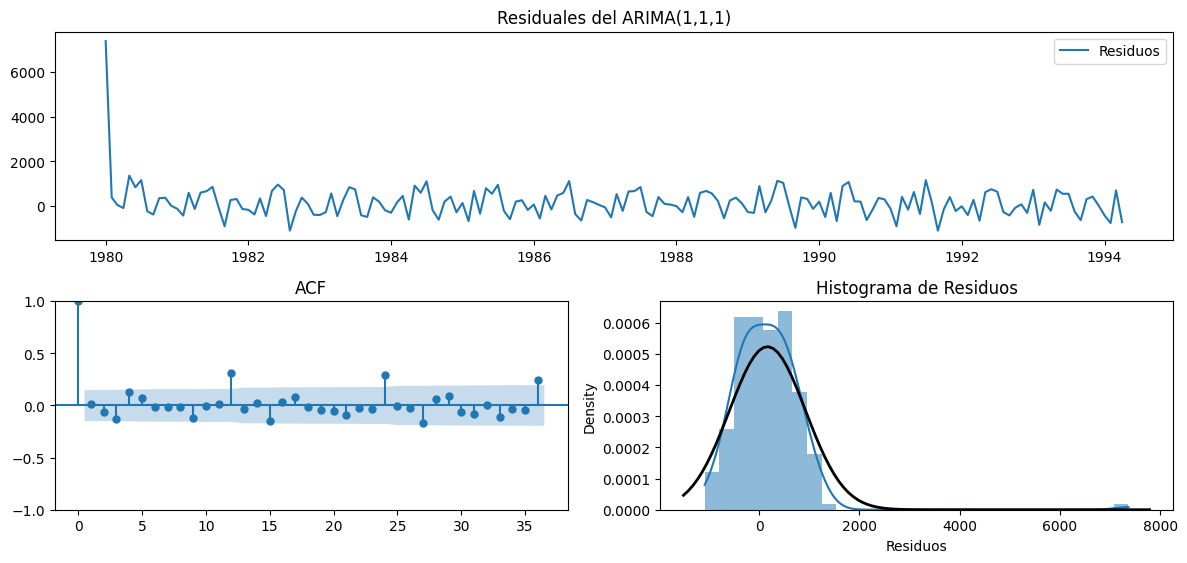

In [227]:
residuals = fit_model.resid
plot_residuals_analysis(residuals, name_model='ARIMA(1,1,1)')


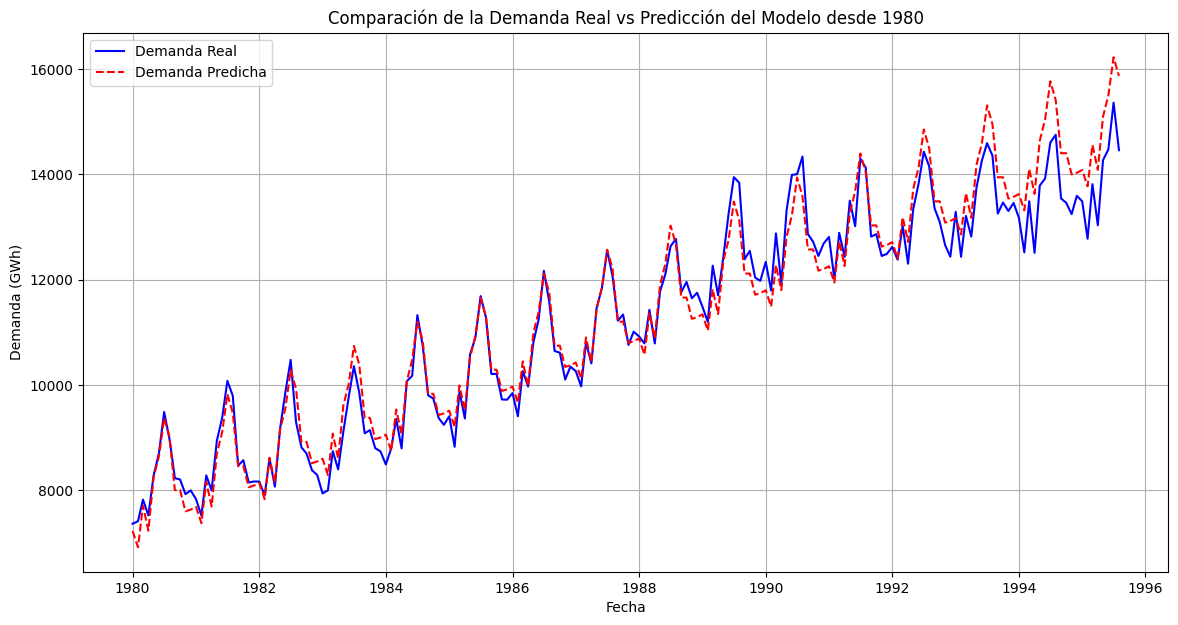

In [228]:
# Ejecutando el código proporcionado por el usuario para entrenar el modelo y obtener las predicciones
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
# Preprocesamiento inicial
# One-hot encoding de la columna 'Month' sin descartar la primera categoría
encoder = OneHotEncoder(sparse=False)
month_encoded = encoder.fit_transform(data[['Month']])
month_encoded_df = pd.DataFrame(month_encoded, columns=[f"Month_{int(i)}" for i in range(1, 13)])
data = pd.concat([data, month_encoded_df], axis=1)

# División del dataset
X = data.drop(columns=['Fecha', 'Demanda(GWh)', 'Month'])
y = data['Demanda(GWh)']
cutoff = int(len(data) * 0.85)

# División secuencial de los datos
X_train = X.iloc[:cutoff]
y_train = y.iloc[:cutoff]
X_test = X.iloc[cutoff:]
y_test = y.iloc[cutoff:]
# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Preparamos el DataFrame completo para la visualización
# Primero, creamos las predicciones para todo el conjunto de datos
y_pred_full = model.predict(X)

# Creamos una columna en el DataFrame original para las predicciones
data['Demanda_Predicha'] = y_pred_full

# Creamos un DataFrame para visualización que combine los datos reales y las predicciones
visualization_full_df = data[['Fecha', 'Demanda(GWh)', 'Demanda_Predicha']].copy()

# Ordenamos por fecha para la visualización
visualization_full_df_sorted = visualization_full_df.sort_values(by='Fecha')

# Visualizamos los resultados
plt.figure(figsize=(14, 7))
sns.lineplot(data=visualization_full_df_sorted, x='Fecha', y='Demanda(GWh)', label='Demanda Real', color='blue')
sns.lineplot(data=visualization_full_df_sorted, x='Fecha', y='Demanda_Predicha', label='Demanda Predicha', color='red', linestyle='--')
plt.title('Comparación de la Demanda Real vs Predicción del Modelo desde 1980')
plt.xlabel('Fecha')
plt.ylabel('Demanda (GWh)')
plt.legend()
plt.grid(True)
plt.show()


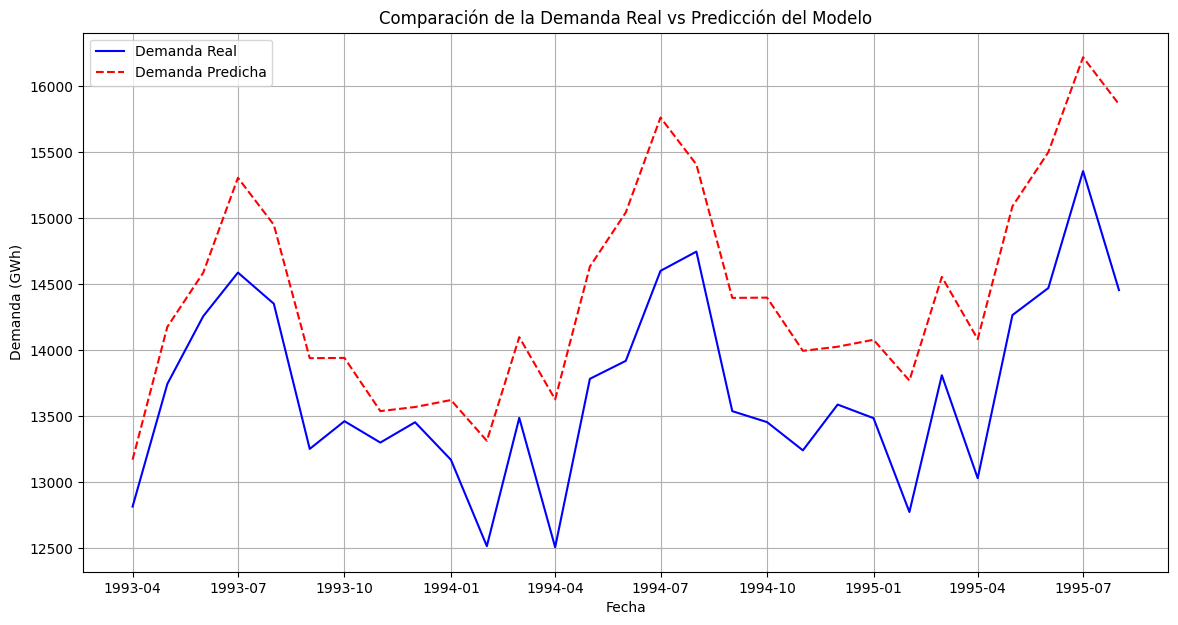

In [229]:
# Agregamos las predicciones y las fechas al DataFrame de test para visualizar
visualization_df = X_test.copy()
visualization_df['Demanda_Real'] = y_test.values
visualization_df['Demanda_Predicha'] = y_pred
visualization_df['Fecha'] = data.loc[visualization_df.index, 'Fecha']

# Ordenamos por fecha para la visualización
visualization_df_sorted = visualization_df.sort_values(by='Fecha')

# Visualizamos los resultados
plt.figure(figsize=(14, 7))
sns.lineplot(data=visualization_df_sorted, x='Fecha', y='Demanda_Real', label='Demanda Real', color='blue')
sns.lineplot(data=visualization_df_sorted, x='Fecha', y='Demanda_Predicha', label='Demanda Predicha', color='red', linestyle='--')
plt.title('Comparación de la Demanda Real vs Predicción del Modelo')
plt.xlabel('Fecha')
plt.ylabel('Demanda (GWh)')
plt.legend()
plt.grid(True)
plt.show()

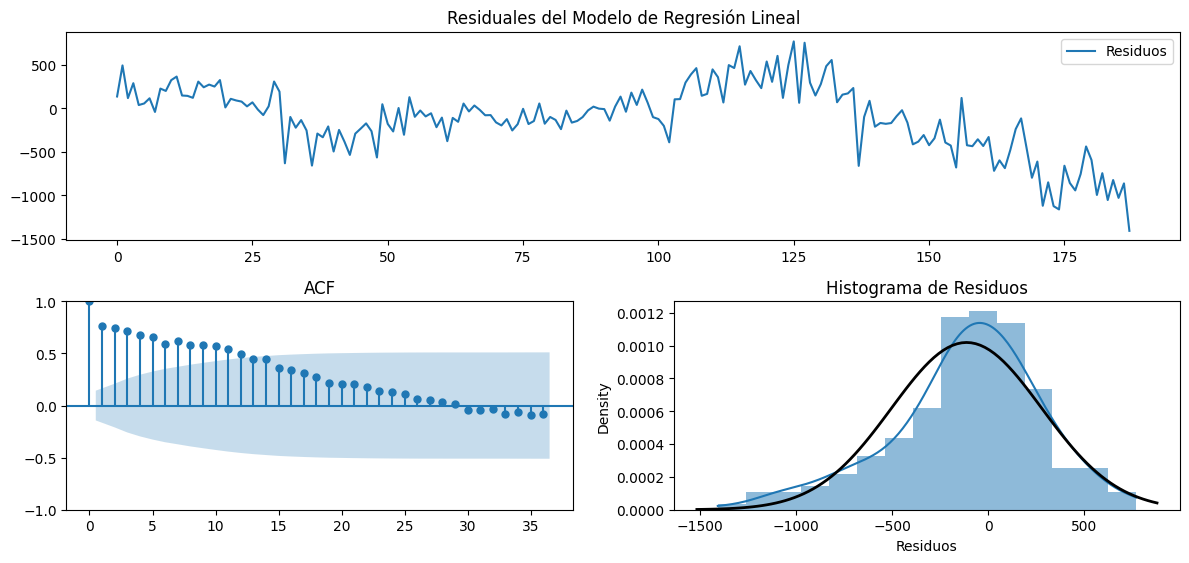

In [230]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import norm

# Primero, calculamos los residuos de todo el modelo
data['Residuos'] = data['Demanda(GWh)'] - data['Demanda_Predicha']
plot_residuals_analysis(data['Residuos'], "Modelo de Regresión Lineal")

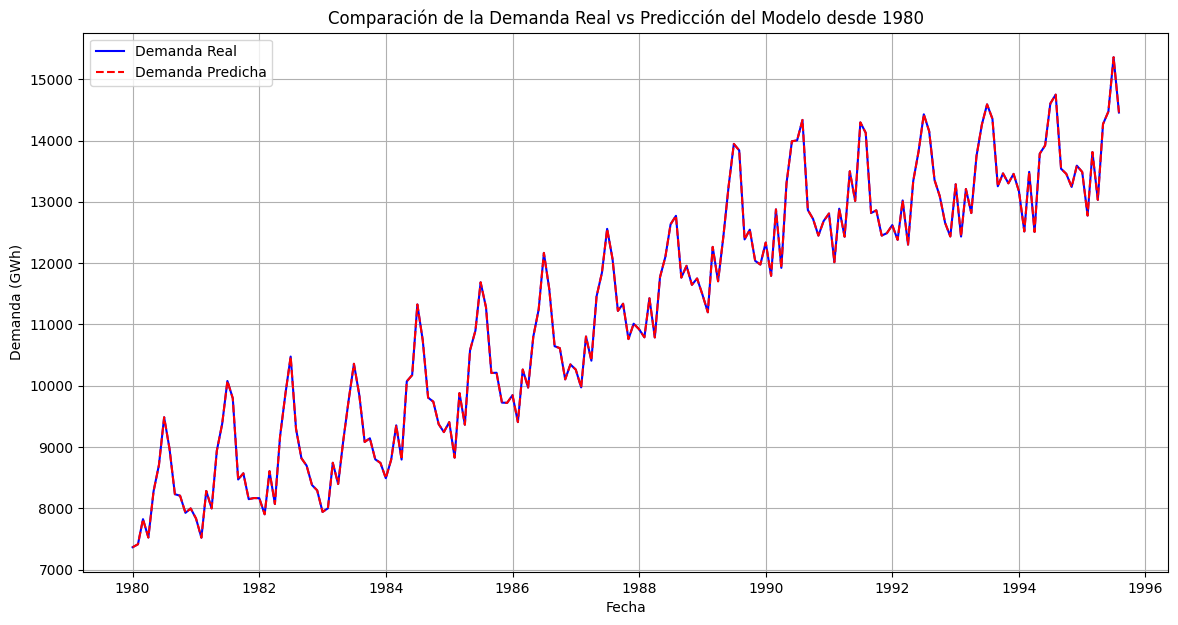

In [231]:
encoder = OneHotEncoder(sparse=False)
month_encoded = encoder.fit_transform(data[['Month']])
month_encoded_df = pd.DataFrame(month_encoded, columns=[f"Month_{int(i)}" for i in range(1, 13)])
data = pd.concat([data, month_encoded_df], axis=1)

# División del dataset
X = data.drop(columns=['Fecha', 'Demanda(GWh)', 'Month'])
y = data['Demanda(GWh)']
cutoff = int(len(data) * 0.85)

# División secuencial de los datos
X_train = X.iloc[:cutoff]
y_train = y.iloc[:cutoff]
X_test = X.iloc[cutoff:]
y_test = y.iloc[cutoff:]
# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Preparamos el DataFrame completo para la visualización
# Primero, creamos las predicciones para todo el conjunto de datos
y_pred_full = model.predict(X)

# Creamos una columna en el DataFrame original para las predicciones
data['Demanda_Predicha'] = y_pred_full

# Creamos un DataFrame para visualización que combine los datos reales y las predicciones
visualization_full_df = data[['Fecha', 'Demanda(GWh)', 'Demanda_Predicha']].copy()

# Ordenamos por fecha para la visualización
visualization_full_df_sorted = visualization_full_df.sort_values(by='Fecha')

# Visualizamos los resultados
plt.figure(figsize=(14, 7))
sns.lineplot(data=visualization_full_df_sorted, x='Fecha', y='Demanda(GWh)', label='Demanda Real', color='blue')
sns.lineplot(data=visualization_full_df_sorted, x='Fecha', y='Demanda_Predicha', label='Demanda Predicha', color='red', linestyle='--')
plt.title('Comparación de la Demanda Real vs Predicción del Modelo desde 1980')
plt.xlabel('Fecha')
plt.ylabel('Demanda (GWh)')
plt.legend()
plt.grid(True)
plt.show()

In [232]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculamos las métricas para el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Coefficient of Determination (R^2): {r2}")

Mean Squared Error (MSE): 3.879191838179716e-24
Root Mean Squared Error (RMSE): 1.96956640867469e-12
Coefficient of Determination (R^2): 1.0


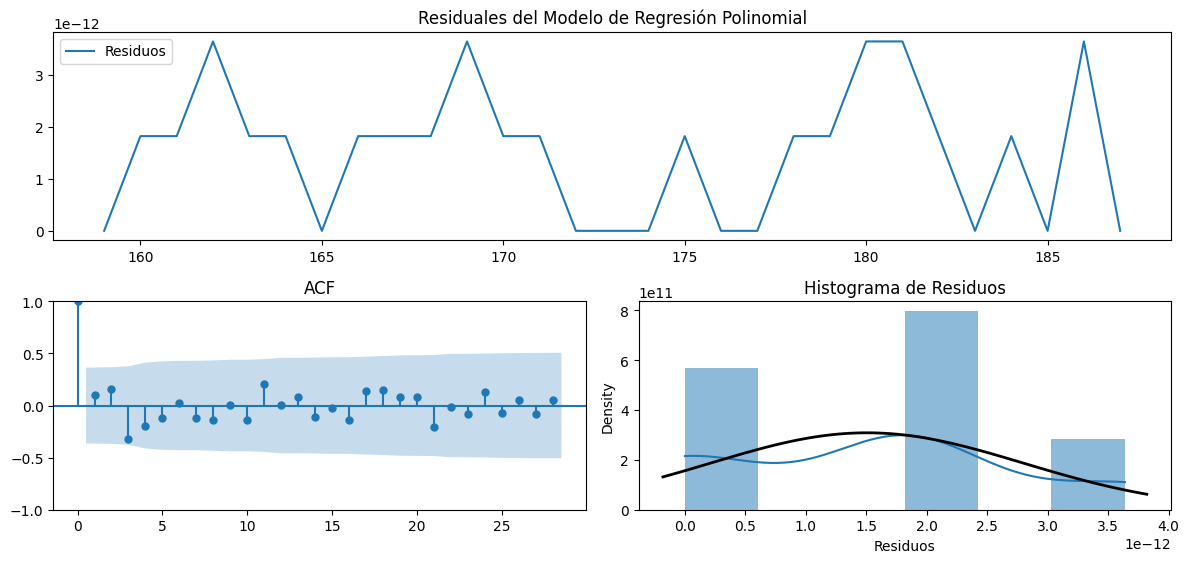

In [234]:
# Calculo de los residuos para el modelo
residuals = y_test - y_pred

# Uso de la función para analizar los residuos
plot_residuals_analysis(pd.Series(residuals, index=X_test.index), "Modelo de Regresión Polinomial")


# Reference

- https://www.statsmodels.org/stable/install.html